In [ ]:
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
cancer = datasets.load_breast_cancer()
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [ ]:
# 이 데이터의 모양 (?행, ?열)
print(cancer.data.shape)

(569, 30)


In [ ]:
# 변수 이름들
print(cancer.feature_names)
# target 이름
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [ ]:
# target 실제값을 수치로 변환한 값 출력
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [ ]:
# 양성 / 음성 데이터가 몇개인지 출력
can = (cancer['target']==0).sum()
print(can)

cer = (cancer['target']==1).sum()
print(cer)

# 구성비가 다르다. 구성비가 불균형하다 라는 것을 알 수 있음

212
357


In [ ]:
# 이 데이터를 훈련용, 테스트용으로 나누고, 시험지, 정답지로 나누기
x = cancer.data
y = cancer.target

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,
                                                    random_state=1024,
                                                    stratify=cancer.target
                                                    # 구성비가 다른 불균형 상황에서는 stratify 옵션 넣어주기
                                                    # train, test 데이터에 있는 label 값의 비율이 서로 다르면
                                                    # 학습결과나 모델평가 등에서 잘못된 영향을 끼칠 가능성이 있음
                                                    # dataset쪽의 클래스의 비율과 같은 비율로 조정
                                                    )

In [ ]:
# 의사결정나무 모델 생성 (깊이 = 4)
cancer_tree = DecisionTreeClassifier(max_depth=4)

In [ ]:
# 모델 학습
cancer_tree.fit(x, y)

DecisionTreeClassifier(max_depth=4)

In [ ]:
# 정확도 확인
print(cancer_tree.score(x_train,y_train))
print(cancer_tree.score(x_test,y_test))

0.989010989010989
0.956140350877193


In [ ]:
from sklearn.tree import export_graphviz
from subprocess import check_call
import graphviz

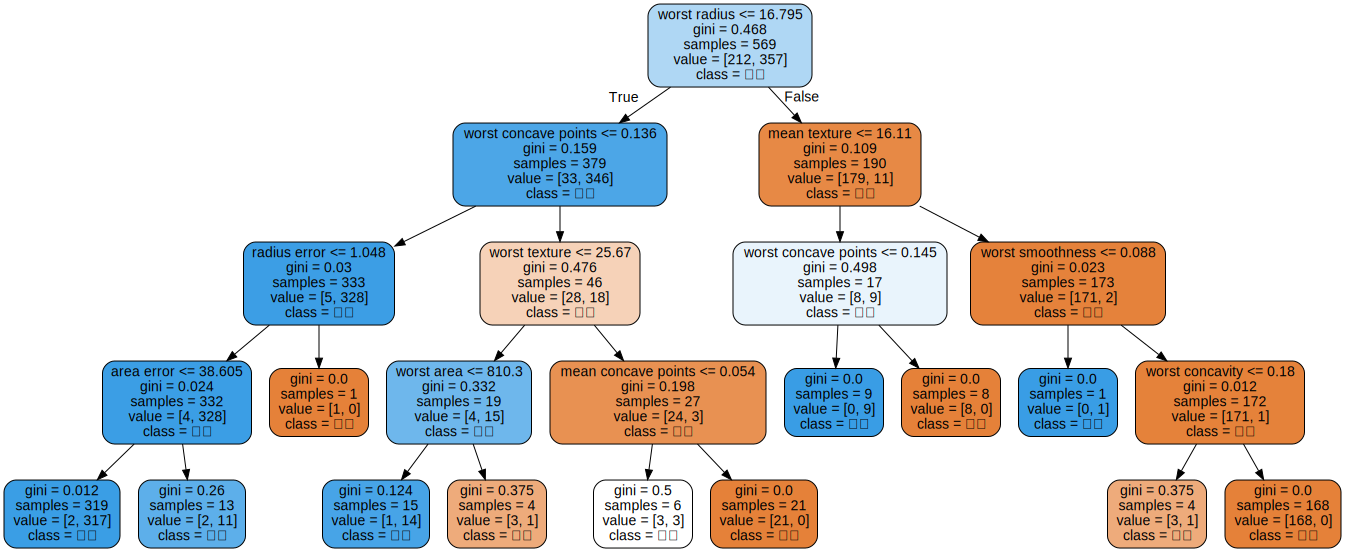

In [ ]:
# dot -> png로 나타내는 작업
# 열의 이름으로 분류하게 -> 예측할 클래스의 이름을 '양성','음성'
cancerTree = export_graphviz(
    cancer_tree,
    out_file=None,
    feature_names=cancer.feature_names,
    class_names = ['양성','음성'],
    rounded = True,
    filled = True

)

graph = graphviz.Source(cancerTree)
graph